In [1]:
# after implementing new envelope misfit function,
# would like to check gradient consistency
# the testdata/testsrc setup could be used for that.

In [2]:
# what we need for preparation:
# - compute the gradient for the input source
# - have a vector of smaller and smaller steps
# - have a random update to the model
# - compute m0

# what we do then for each step in the step vector:
# - scale the random update by this step
# - compute the model of the input plus the update
# - get the misfit of that model output
# - get the relative error between this misfit and m0
# - record (step,relative error)

In [49]:
import os
import numpy as np
from obspy import read
from pandas import read_csv
import h5py
import matplotlib.pyplot as plt
mtype = 'square_envelope'

In [50]:
# compute the gradient for the input model
os.system('cp -R ../test/testdata/testsrc/wavefield_processed_archived/ \
          ../test/testdata/testsrc/wavefield_processed')
os.system('cp ../test/testdata/testsrc/step_0/starting_model_archived.h5 \
          ../test/testdata/testsrc/step_0/starting_model.h5')
os.mkdir('../test/testdata/testsrc/step_0/corr')
os.mkdir('../test/testdata/testsrc/step_0/adjt')
os.mkdir('../test/testdata/testsrc/step_0/kern')
os.mkdir('../test/testdata/testsrc/step_0/grad')
os.system('cp inputs/measr_config.json ../test/testdata/testsrc/')
os.system('cp inputs/source_config.json ../test/testdata/testsrc/')
os.system('cp inputs/config.json ../test/testdata/')

0

In [51]:
os.system('noisi correlation ../test/testdata/testsrc 0')
### remove output after finishing

0

In [52]:
os.system('noisi measurement ../test/testdata/testsrc 0')
m0 = read_csv('../test/testdata/testsrc/step_0/'+mtype+'.0.measurement.csv')['l2_norm'][0]
print(m0)

299.319251583


In [53]:
os.system('noisi kernel ../test/testdata/testsrc 0')

0

In [54]:
os.system('noisi gradient ../test/testdata/testsrc 0')

0

In [55]:
eps = np.arange(-6,1.5,0.2)

In [56]:
grad = np.load('../test/testdata/testsrc/step_0/grad/grad_all.npy')
print(grad)

[[ 3.18551112  3.39172396  3.7422353  ...,  3.66293192  3.27307959
   3.03442134]]


In [57]:
direction = (np.random.random((grad.shape))-0.5)

In [58]:
m_grad = np.dot(direction,np.transpose(grad))[0]
print(m_grad)

[ 19.3482503]


In [59]:

def get_misfit_from_direction(dvec):
    os.system('rm ../test/testdata/testsrc/step_0/starting_model.h5')
    
    os.system('cp ../test/testdata/testsrc/step_0/starting_model_archived.h5 \
          ../test/testdata/testsrc/step_0/starting_model.h5')
    f = h5py.File('../test/testdata/testsrc/step_0/starting_model.h5','a')
    
    f['distr_basis'][:] += dvec
    f.close()

    
    os.system('rm ../test/testdata/testsrc/step_0/corr/\
NET.STA1..CHA--NET.STA2..CHA.sac')
    
    os.system('rm ../test/testdata/testsrc/step_0/'+
              mtype+'.0.measurement.csv')
    
    os.system('noisi correlation ../test/testdata/testsrc 0')
    tr = read('../test/testdata/testsrc/step_0/corr/*')
    corr = tr[0].data
    os.system('noisi measurement ../test/testdata/testsrc 0')
    msr = read_csv('../test/testdata/testsrc/step_0/'+
                   mtype+'.0.measurement.csv')
    msr = msr['l2_norm'][0]
    
    return(msr,corr)
    
    
    

0
12.2506091884
0.366836328795
1
18.0660623953
0.0662689328758
2
15.0343619094
0.222960129219
3
20.2099978959
0.0445387870947
4
19.0618313329
0.0148033521422
5
18.8949719359
0.0234273566125
6
19.4149591294
0.00344779672612
7
19.2821462575
0.00341653828263
8
19.3783697533
0.00155670189645
9
19.3930715351
0.00231655260782
10
19.3447326606
0.000181806349919
11
19.3715648967
0.00120499791961
12
19.3255503005
0.00117323243663
13
19.3671064352
0.000974565635943
14
19.3555357622
0.000376543961617
15
19.358806152
0.000545571639559
16
19.3403888431
0.000406313342433
17
19.3501397425
9.76546781614e-05
18
19.3499200358
8.62992977962e-05
19
19.3483602686
5.68388234304e-06
20
19.3474497886
4.13735986715e-05
21
19.3475863851
3.43137114603e-05
22
19.3486153893
1.88696088488e-05
23
19.3482996482
2.55076253175e-06
24
19.3486728504
2.18394450247e-05
25
19.3491876192
4.84448883284e-05
26
19.3505087905
0.000116728649037
27
19.3538647086
0.000290176795165
28
19.3623285426
0.000727623789146
29
19.3836979164

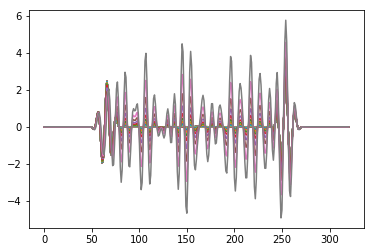

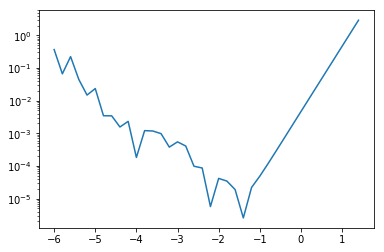

In [60]:
results = np.zeros(len(eps))
mf_a = np.zeros(len(eps))
plt.figure
for i in range(len(eps)):
    print(i)
    val = 10**eps[i]
    msr1,corr = get_misfit_from_direction(val*direction)
    msr2,corr2 = get_misfit_from_direction(-val*direction)
    mf_approx = 1./(2.*val)*(msr1-msr2)
    print(mf_approx)
    results[i] = np.abs(m_grad-mf_approx)/np.abs(m_grad)
    mf_a[i] = mf_approx
    print(results[i])
    plt.plot(corr)

plt.show()
plt.semilogy(eps,results)
plt.show()

In [61]:
# removing copied files...
os.system('rm -rf ../test/testdata/testsrc/wavefield_processed')
os.system('rm ../test/testdata/testsrc/step_0/starting_model.h5')
os.system('rm -rf ../test/testdata/testsrc/step_0/corr')
os.system('rm -rf ../test/testdata/testsrc/step_0/adjt')
os.system('rm -rf ../test/testdata/testsrc/step_0/kern')
os.system('rm -rf ../test/testdata/testsrc/step_0/grad')
os.system('rm ../test/testdata/testsrc/measr_config.json')
os.system('rm ../test/testdata/testsrc/source_config.json')
os.system('rm ../test/testdata/config.json')

0

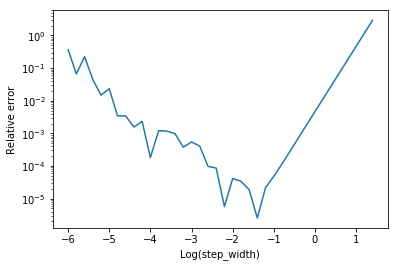

In [62]:
plt.semilogy(eps,results)
plt.xlabel('Log(step_width)')
plt.ylabel('Relative error')
plt.show()

In [43]:
print(msr2)

65.7046487111
